<a href="https://colab.research.google.com/github/anshupandey/Machine_Learning_Training/blob/master/Image_classification_using_CNN_04_June_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration

In [66]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
(xtr,ytr),(xts,yts) = fashion_mnist.load_data()

In [67]:

names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
len(names)

10

In [68]:
print(xtr.shape)
print(xts.shape)
print(ytr.shape)
print(yts.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


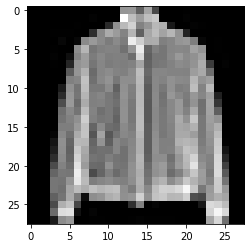

In [69]:
plt.imshow(xtr[68],cmap='gray')
plt.show()

In [70]:
ytr[68]

4

In [71]:
names[ytr[68]]

'Coat'

## Preprocessing of data

In [72]:
ytr

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [73]:
# for multiclass classification, we need to onehotencode the labels
from tensorflow.keras.utils import to_categorical
ytr = to_categorical(ytr)
print(ytr.shape)
yts = to_categorical(yts)
print(yts.shape)

(60000, 10)
(10000, 10)


In [74]:
# converting images into channel format
print(xtr.shape)
print(xts.shape)

(60000, 28, 28)
(10000, 28, 28)


In [75]:
# resize the image to channel format
xtr = xtr.reshape(60000,28,28,1)
xts = xts.reshape(10000,28,28,1)
print(xtr.shape)
print(xts.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## modelling of Neural Network

In [76]:
from tensorflow.keras import models,layers

In [91]:
# creating input layer
input_layer = layers.Input(shape=(28,28,1))

c1 = layers.Conv2D(filters=8,kernel_size=(3,3),activation='relu')(input_layer)
c2 = layers.Conv2D(filters=15,kernel_size=(3,3),activation='relu')(c1)
p1 = layers.MaxPooling2D(pool_size=(2,2))(c2)

c3 = layers.Conv2D(filters=30,kernel_size=(3,3),activation='relu')(p1)
c4 = layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu')(c3)


# add a flatten layer
ft = layers.Flatten()(c4)

# add the first hidden layer -> full connnected layer where each neuron does weighted sum and activation function. such layers in tensorflow are termed as dense layers
h1 = layers.Dense(120,activation='relu')(ft)

# add the second hidden layer
h2 = layers.Dense(84,activation='relu')(h1)

# add the final output layer
output_layer = layers.Dense(10,activation='softmax')(h2)


model = models.Model(inputs=input_layer,outputs=output_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 15)        1095      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 15)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 30)        4080      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 50)          13550     
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0   

In [92]:
# metrics - to check performance of the model e.g. - accuracy, recall, r2 score
# optmizier - the optmizier which will update the weights and bais to minimize the error function, e.g. adam, sgd, RMSProp => we prefer using adam as it tunes learning rate automaticalllu
# loss = how the overall error to be calculated, for regression - mse , for two class classification - binary_crossentropy, for multiclass classification - categorical_crossentropy

model.compile(metrics=['accuracy'],optimizer='adam',loss='categorical_crossentropy')
model.fit(xtr,ytr,epochs=10,batch_size=1000,validation_data=(xts,yts))

Epoch 1/10
60/60 [==============================] - 2s 20ms/step - loss: 1.9830 - accuracy: 0.6371 - val_loss: 0.5083 - val_accuracy: 0.8139
Epoch 2/10
60/60 [==============================] - 1s 18ms/step - loss: 0.4179 - accuracy: 0.8490 - val_loss: 0.3988 - val_accuracy: 0.8632
Epoch 3/10
60/60 [==============================] - 1s 18ms/step - loss: 0.3495 - accuracy: 0.8739 - val_loss: 0.3794 - val_accuracy: 0.8648
Epoch 4/10
60/60 [==============================] - 1s 18ms/step - loss: 0.3051 - accuracy: 0.8888 - val_loss: 0.3554 - val_accuracy: 0.8769
Epoch 5/10
60/60 [==============================] - 1s 18ms/step - loss: 0.2703 - accuracy: 0.9009 - val_loss: 0.3471 - val_accuracy: 0.8757
Epoch 6/10
60/60 [==============================] - 1s 18ms/step - loss: 0.2453 - accuracy: 0.9105 - val_loss: 0.3304 - val_accuracy: 0.8850
Epoch 7/10
60/60 [==============================] - 1s 18ms/step - loss: 0.2270 - accuracy: 0.9168 - val_loss: 0.3273 - val_accuracy: 0.8858
Epoch 8/10
60

In [93]:
ypred = model.predict(xts)
ypred = [np.argmax(i) for i in ypred]
yts2 = [np.argmax(i) for i in yts]
from sklearn.metrics import accuracy_score
accuracy_score(yts2,ypred)

0.8908

In [94]:
from sklearn import metrics
print(metrics.classification_report(yts2,ypred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.81      0.83      0.82      1000
           3       0.91      0.89      0.90      1000
           4       0.80      0.83      0.81      1000
           5       0.96      0.98      0.97      1000
           6       0.73      0.66      0.69      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.96      0.97      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [95]:
import pandas as pd
pd.DataFrame(metrics.confusion_matrix(yts2,ypred),columns=names,index=names)

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,876,2,23,11,4,1,75,0,8,0
Trouser,2,979,0,8,3,0,8,0,0,0
Pullover,24,0,828,8,77,0,59,0,4,0
Dress,22,7,11,893,34,0,31,0,2,0
Coat,2,2,77,28,830,0,61,0,0,0
Sandal,0,0,0,0,0,982,0,10,0,8
Shirt,133,2,80,24,90,0,660,0,11,0
Sneaker,0,0,0,0,0,30,0,952,0,18
Bag,11,0,7,7,3,3,6,5,958,0
Ankle boot,1,0,0,1,0,12,0,36,0,950


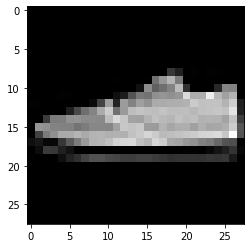

In [81]:
plt.imshow(xts[60].reshape(28,28),cmap='gray')
plt.show()

In [82]:
prob = model.predict(xts[60].reshape(1,28,28))
np.argmax(prob)

7

In [83]:
names[7]

'Sneaker'

In [84]:
!wget -q https://www.heuritech.com/wp-content/uploads/2019/07/Sneakers-Chanel-Spring-Summer-2018-pre-collection-1030x687.jpg

In [85]:
!wget -q https://st2.depositphotos.com/3280929/8595/v/950/depositphotos_85955332-stock-illustration-floral-mosaic-white-ankle-boot.jpg

In [86]:
from tensorflow.keras.preprocessing import image
img = image.img_to_array(image.load_img("depositphotos_85955332-stock-illustration-floral-mosaic-white-ankle-boot.jpg",target_size=(28,28),grayscale=True))
img.shape

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(28, 28, 1)

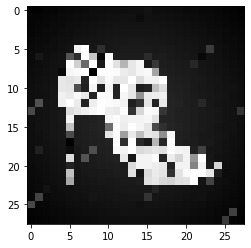

In [87]:
plt.imshow(img.reshape(28,28),cmap='gray')
plt.show()

In [88]:
proba = model.predict(img.reshape(1,28,28,1))
np.argmax(proba)

0

In [89]:
names[6]

'Shirt'